# NYPD Civilian Complaints
This project contains data on 12,000 civilian complaints filed against New York City police officers. Interesting questions to consider include:
- Does the length that the complaint is open depend on ethnicity/age/gender?
- Are white-officer vs non-white complaintant cases more likely to go against the complainant? 
- Are allegations more severe for cases in which the officer and complaintant are not the same ethnicity?
- Are the complaints of women more succesful than men (for the same allegations?)

There are a lot of questions that can be asked from this data, so be creative! You are not limited to the sample questions above.

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers).

Note: you don't need to provide any information to obtain the data. Just agree to the terms of use and click "submit."

### Cleaning and EDA
- Clean the data.
    - Certain fields have "missing" data that isn't labeled as missing. For example, there are fields with the value "Unknown." Do some exploration to find those values and convert them to null values.
    - You may also want to combine the date columns to create a `datetime` column for time-series exploration.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

### Assessment of Missingness
- Assess the missingness per the requirements in `project03.ipynb`

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
The question I will be focusing on in this project is "Are cases in which the officer and complaintant are not the same ethnicity more likely to have difference in board resuld?"

The dataset consists of more than 12,000 civilian complaints filed against New York City police officers. The New York City’s Civilian Complaint Review Board provided with records about closed cases for every police officer still on the force as of late June 2020 who had at least one substantiated allegation against them. The records span decades, from September 1985 to January 2020.

Each record in the data lists the name, rank, shield number, and precinct of each officer as of today and at the time of the incident; the age, race and gender of the complainant and the officer; a category describing the alleged misconduct; and whether the CCRB concluded the officers’ conduct violated NYPD rules.

observations: 33358

number of variables: 27

variable names: 'unique_mos_id' 'first_name' 'last_name' 'command_now' 'shield_no' 'complaint_id' 'month_received' 'year_received' 'month_closed' 'year_closed' 'command_at_incident' 'rank_abbrev_incident' 'rank_abbrev_now' 'rank_now' 'rank_incident' 'mos_ethnicity' 'mos_gender' 'mos_age_incident' 'complainant_ethnicity' 'complainant_gender' 'complainant_age_incident' 'fado_type' 'allegation' 'precinct' 'contact_reason' 'outcome_description' 'board_disposition'

some describtion of variables: 
1. fado_type: Top-level category of complaint, consists with 4 categories (Offensive Language, Discourtesy, Abuse of Authority, Force) and more specific complaints within each category.
2. allegation: Specific category of complaint in each fado_type
3. board_disposition: corresponds to the outcome_description, it is the final investigation result by the CCRB, which consists with 3 outcomes(Substantiated, Exonerated, Unsubstantiated)

In this project, I will focus on exploring the connection between the ethnicity(both officer and complaintant) and the board disposition of these cases. Therefore, the variables of ['unique_mos_id', 'complaint_id', 'year_received', 'year_closed', 'mos_ethnicity', 'complainant_ethnicity', 'board_disposition'] will be selected. As I understand it, these fully investigated cases can somehow reveal whether the ethnicity of both officer and complaintant are the same can influence the outcome of complaint. 

### Cleaning and EDA
The general EDA of this project is to discover the connection between ethnicity and whether it will affect the outcome, however, during the process of cleaning, I discoverd a few things about the dataset:
1. Even though there are fluctuation, white people are the majority in officer across all years, and black people are the majority in complainant. There are more Asian officers while very few complainant. Among both groups, Native American are the fewest.
2. The total counts of officer and complainant are different in all years, namely, more officers than the complainants. This result indecates that there is still a lot NaN values in complainants' ethnicity that we need to deal with.
3. The amount of cases across years are different, namely, more recent years have more cases, which reach its peak around 2015 - 2016.
4. Suprisingly, I noticed that there is a huge missingness that complainant_ethnicity does not contain the data before 2000.The missingness only apply on year_closed < 2000, not on year_received.
5. From the bar plots, number of cases grouped by year_closed has more fluctuation than the number of cases grouped by year_recieved, which indecates that the time of investigation varies from case to case and fluctuates.

### Assessment of Missingness
In this section, I performed several permutation tests on missingness and columns, specifically year_recieved, year_closed, board_disposition, and mos_ethnicity with a confidence threshold of 0.005.

Significantly, I found out that the missingness in complainant_ethnicity is MAR dependent on year_recieved, year_closed, and even on mos_ethnicity. Additionally, the missingness is independent on board_disposition.

Results in p-values:
1. year_recieved: 0.0
2. year_closed: 0.0
3. mos_ethnicity KS: 0.006
4. mos_ethnicity TVD: 0.004
5. board_disposition KS: 0.02
6. board_disposition TVD: 0.028

Notably, the p-value of missingness dependent on mos_ethnicity is very close to our threshold 0.005, and sometimes smaller based on the N=1000 permutation tests.

In this case, the deletion of the missingness rows will surely affect the usefullness of this project, given that our key component, compare column is depend on comparing complainant_ethnicity and mos_ethnicity. Even though we cannot fully discover the hidden connection between two, we can still conclude that the ethnicity of officers significantly affect the data collection of complainants' ethnicity. Unfortunately, I do not have further knowledge about what caused this missing and what to fill the gaps, I may delete these NaN rws or perform imputation.
### Hypothesis Test
Given that our question is "Are cases in which the officer and complaintant are not the same ethnicity more likely to have difference in board resuld?"

Null Hypothesis: The cases which officers' and complainants' ethnicity are different and the ones are the same have the same successeful rate.

Alternative Hypothesis: The cases which officers' and complainants' ethnicity are different and the ones are the same have different successeful rate.

Test Statistics: Mean. TVD, KS Given that we can either treat board_disposition as numerical (1 and 0) while compare as grouping category, or we can treat board_disposition as categorical. In this case, we can use all three test statistics for permutation tests.

Significant Level: 0.01

Results:
1. Difference in Mean: 0.067000
2. TVD: 0.141000
3. KS: 0.142000

As we can see, in all three permutaion tests, p-values are all bigger than our significant level (0.01), therefore, it cannot support the alternative hypothses, we cannot conclude that the null hypothesis is wrong. In this case, we cannot prove that the cases which officers' and complainants' ethnicity are different and the ones are the same have different successeful rate.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

#### Data Import

In [2]:
original = pd.read_csv('data/allegations_202007271729.csv')
original.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [3]:
print(original.columns.values)

['unique_mos_id' 'first_name' 'last_name' 'command_now' 'shield_no'
 'complaint_id' 'month_received' 'year_received' 'month_closed'
 'year_closed' 'command_at_incident' 'rank_abbrev_incident'
 'rank_abbrev_now' 'rank_now' 'rank_incident' 'mos_ethnicity' 'mos_gender'
 'mos_age_incident' 'complainant_ethnicity' 'complainant_gender'
 'complainant_age_incident' 'fado_type' 'allegation' 'precinct'
 'contact_reason' 'outcome_description' 'board_disposition']


Here, I will check which columns have NA values.

In [4]:
na_cols = original.isna().any(axis = 0)
na_cols

unique_mos_id               False
first_name                  False
last_name                   False
command_now                 False
shield_no                   False
complaint_id                False
month_received              False
year_received               False
month_closed                False
year_closed                 False
command_at_incident          True
rank_abbrev_incident        False
rank_abbrev_now             False
rank_now                    False
rank_incident               False
mos_ethnicity               False
mos_gender                  False
mos_age_incident            False
complainant_ethnicity        True
complainant_gender           True
complainant_age_incident     True
fado_type                   False
allegation                   True
precinct                     True
contact_reason               True
outcome_description          True
board_disposition           False
dtype: bool

Then, I will focus on the labels of both complainant_ethnicity and mos_ethnicity, while finding the labels of missingness.

In [5]:
print(original['complainant_ethnicity'].unique())
print(original['mos_ethnicity'].unique())

['Black' nan 'White' 'Asian' 'Refused' 'Hispanic' 'Unknown' 'Other Race'
 'American Indian']
['Hispanic' 'White' 'Black' 'Asian' 'American Indian']


In [6]:
original['complainant_ethnicity'].value_counts()

Black              17114
Hispanic            6424
White               2783
Unknown             1041
Other Race           677
Asian                532
Refused              259
American Indian       64
Name: complainant_ethnicity, dtype: int64

In [7]:
original['mos_ethnicity'].value_counts()

White              18074
Hispanic            9150
Black               4924
Asian               1178
American Indian       32
Name: mos_ethnicity, dtype: int64

Similarly, I will check the labels of board_disposition while deciding how to group them.

In [8]:
original['board_disposition'].value_counts()

Unsubstantiated                             15448
Exonerated                                   9609
Substantiated (Charges)                      3796
Substantiated (Formalized Training)          1033
Substantiated (Command Discipline A)          964
Substantiated (Command Discipline)            851
Substantiated (Command Discipline B)          789
Substantiated (Command Lvl Instructions)      454
Substantiated (Instructions)                  248
Substantiated (No Recommendations)            165
Substantiated (MOS Unidentified)                1
Name: board_disposition, dtype: int64

As we can see, there are missing values in complainant_ethnicity (NaN, Unknown, Refused). Also, the categories of board_disposition are not uniform. Therefore, I will select the interested columns and do further cleaning

In [408]:
df = original[['unique_mos_id', 'complaint_id', 'year_received', 'year_closed', 'mos_ethnicity', 'complainant_ethnicity', 'board_disposition']]
df # I didn't use head(), given that I think the size of df is appropriate

,unique_mos_id,complaint_id,year_received,year_closed,mos_ethnicity,complainant_ethnicity,board_disposition
0,10004,42835,2019,2020,Hispanic,Black,Substantiated (Command Lvl Instructions)
1,10007,24601,2011,2012,White,Black,Substantiated (Charges)
2,10007,24601,2011,2012,White,Black,Substantiated (Charges)
3,10007,26146,2012,2013,White,Black,Substantiated (Charges)
4,10009,40253,2018,2019,Hispanic,NaN,Substantiated (Command Discipline A)
...,...,...,...,...,...,...,...
33353,9992,35671,2016,2017,White,Asian,Unsubstantiated
33354,9992,35671,2016,2017,White,Asian,Unsubstantiated
33355,9992,35671,2016,2017,White,Asian,Substantiated (Formalized Training)
33356,9992,35671,2016,2017,White,Asian,Substantiated (Formalized Training)


We find that some complainant will submit multiple complaints towards the same officer, which we should treat them as different cases.We will clean both complainant_ethnicity and board_disposition by replacing missing values with np.nan and uniform the category by uniforming the board_disposition into three groups (Substantiated, Exonerated, Unsubstantiated)

In [409]:
def clean_race(string):
    if (string == 'Unknown') | (string == 'Other Race') | (string == 'Refused'):
        return np.nan
    else:
        return string

In [410]:
df.loc[:, 'complainant_ethnicity'] = df['complainant_ethnicity'].apply(clean_race)
df['complainant_ethnicity'].unique()

E:\anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


array(['Black', nan, 'White', 'Asian', 'Hispanic', 'American Indian'],
      dtype=object)

In [411]:
df.complainant_ethnicity.value_counts()

Black              17114
Hispanic            6424
White               2783
Asian                532
American Indian       64
Name: complainant_ethnicity, dtype: int64

In this step, I will group Unsubstantiated and Exonerated into Unsuccessful, and set Substantiated as Successful.

In [412]:
def clean_disposition(string):
    if ('Substantiated' in string):
        return True
    else:
        return False

In [413]:
df.loc[:, 'board_disposition'] = df['board_disposition'].apply(clean_disposition)
df.board_disposition.value_counts()

E:\anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


False    25057
True      8301
Name: board_disposition, dtype: int64

Next, we will ckeck the distribution of our data across different years.

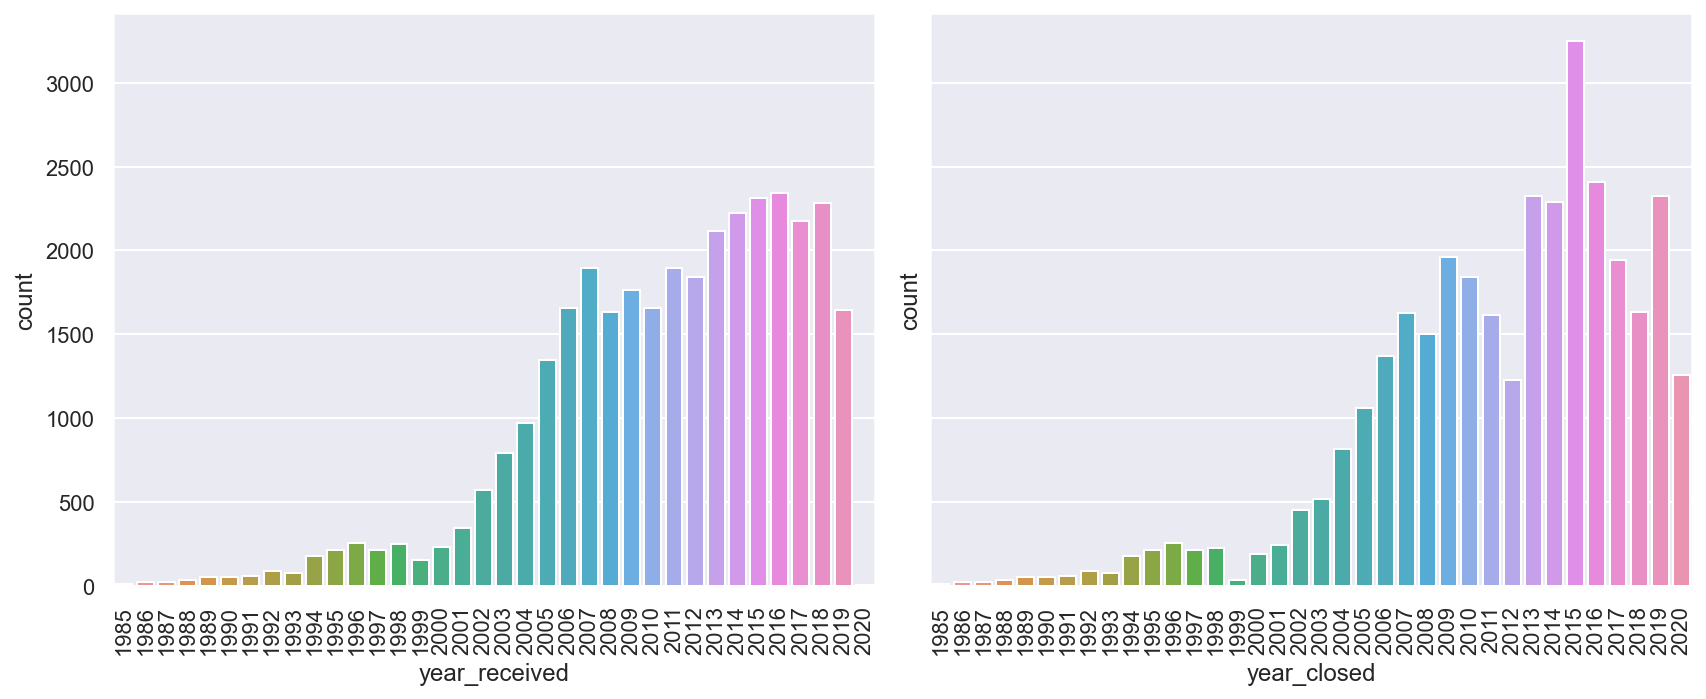

In [374]:
fig, axes = plt.subplots(ncols = 2, sharey = True, sharex=True, figsize=(12,5))
sns.countplot(x="year_received", data= df, ax = axes[0])
sns.countplot(x = 'year_closed', data = df, ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
fig.tight_layout()

Here, we suprisingly noticed that there is a huge missingness that complainant_ethnicity does not contain the data before 2000.The missingness only apply on year_closed < 2000, not on year_received.

In [375]:
original[original['year_received'] < 2000]['complainant_ethnicity'].notna().sum()

108

In [376]:
original[original['year_closed'] < 2000]['complainant_ethnicity'].notna().sum()

0

Therefore, we will clean out all the rows tha close case before 2000, given that there are no records of complainant_ethnicity before that.

In [414]:
df = df[df['year_closed'] >= 2000].reset_index().drop('index', axis = 1)
df.year_closed.unique()

array([2020, 2012, 2013, 2019, 2017, 2016, 2018, 2014, 2015, 2011, 2002,
       2003, 2009, 2004, 2006, 2008, 2010, 2007, 2005, 2000, 2001],
      dtype=int64)

In [378]:
def pivoting(col, row):
    out = df.groupby([col, row]).size().reset_index().pivot(columns=col,
                                                            index=row,
                                                            values=0)
    return out

In [379]:
df_plot1 = pivoting('complainant_ethnicity', 'year_received')
df_plot1.head()

complainant_ethnicity,American Indian,Asian,Black,Hispanic,White
year_received,,,,,
1998,NaN,NaN,15.0,4.0,NaN
1999,NaN,NaN,57.0,24.0,5.0
2000,NaN,2.0,144.0,39.0,12.0
2001,NaN,NaN,190.0,70.0,43.0
2002,NaN,15.0,317.0,100.0,53.0


In [380]:
df_plot2 = pivoting('mos_ethnicity', 'year_received')
df_plot2.head()

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
year_received,,,,,
1997,NaN,NaN,NaN,NaN,1.0
1998,NaN,NaN,NaN,NaN,28.0
1999,NaN,5.0,19.0,12.0,88.0
2000,NaN,3.0,16.0,42.0,171.0
2001,NaN,7.0,57.0,47.0,233.0


In [381]:
df_plot1_1 = pivoting('complainant_ethnicity', 'year_closed')
df_plot1_1.head()

complainant_ethnicity,American Indian,Asian,Black,Hispanic,White
year_closed,,,,,
2000,NaN,NaN,102.0,27.0,7.0
2001,NaN,2.0,126.0,55.0,21.0
2002,NaN,4.0,264.0,73.0,46.0
2003,NaN,10.0,296.0,93.0,56.0
2004,NaN,8.0,463.0,158.0,71.0


In [382]:
df_plot2_1 = pivoting('mos_ethnicity', 'year_closed')
df_plot2_1.head()

mos_ethnicity,American Indian,Asian,Black,Hispanic,White
year_closed,,,,,
2000,NaN,7.0,22.0,20.0,139.0
2001,NaN,1.0,22.0,44.0,175.0
2002,NaN,23.0,68.0,58.0,303.0
2003,NaN,19.0,75.0,99.0,325.0
2004,NaN,14.0,119.0,188.0,492.0


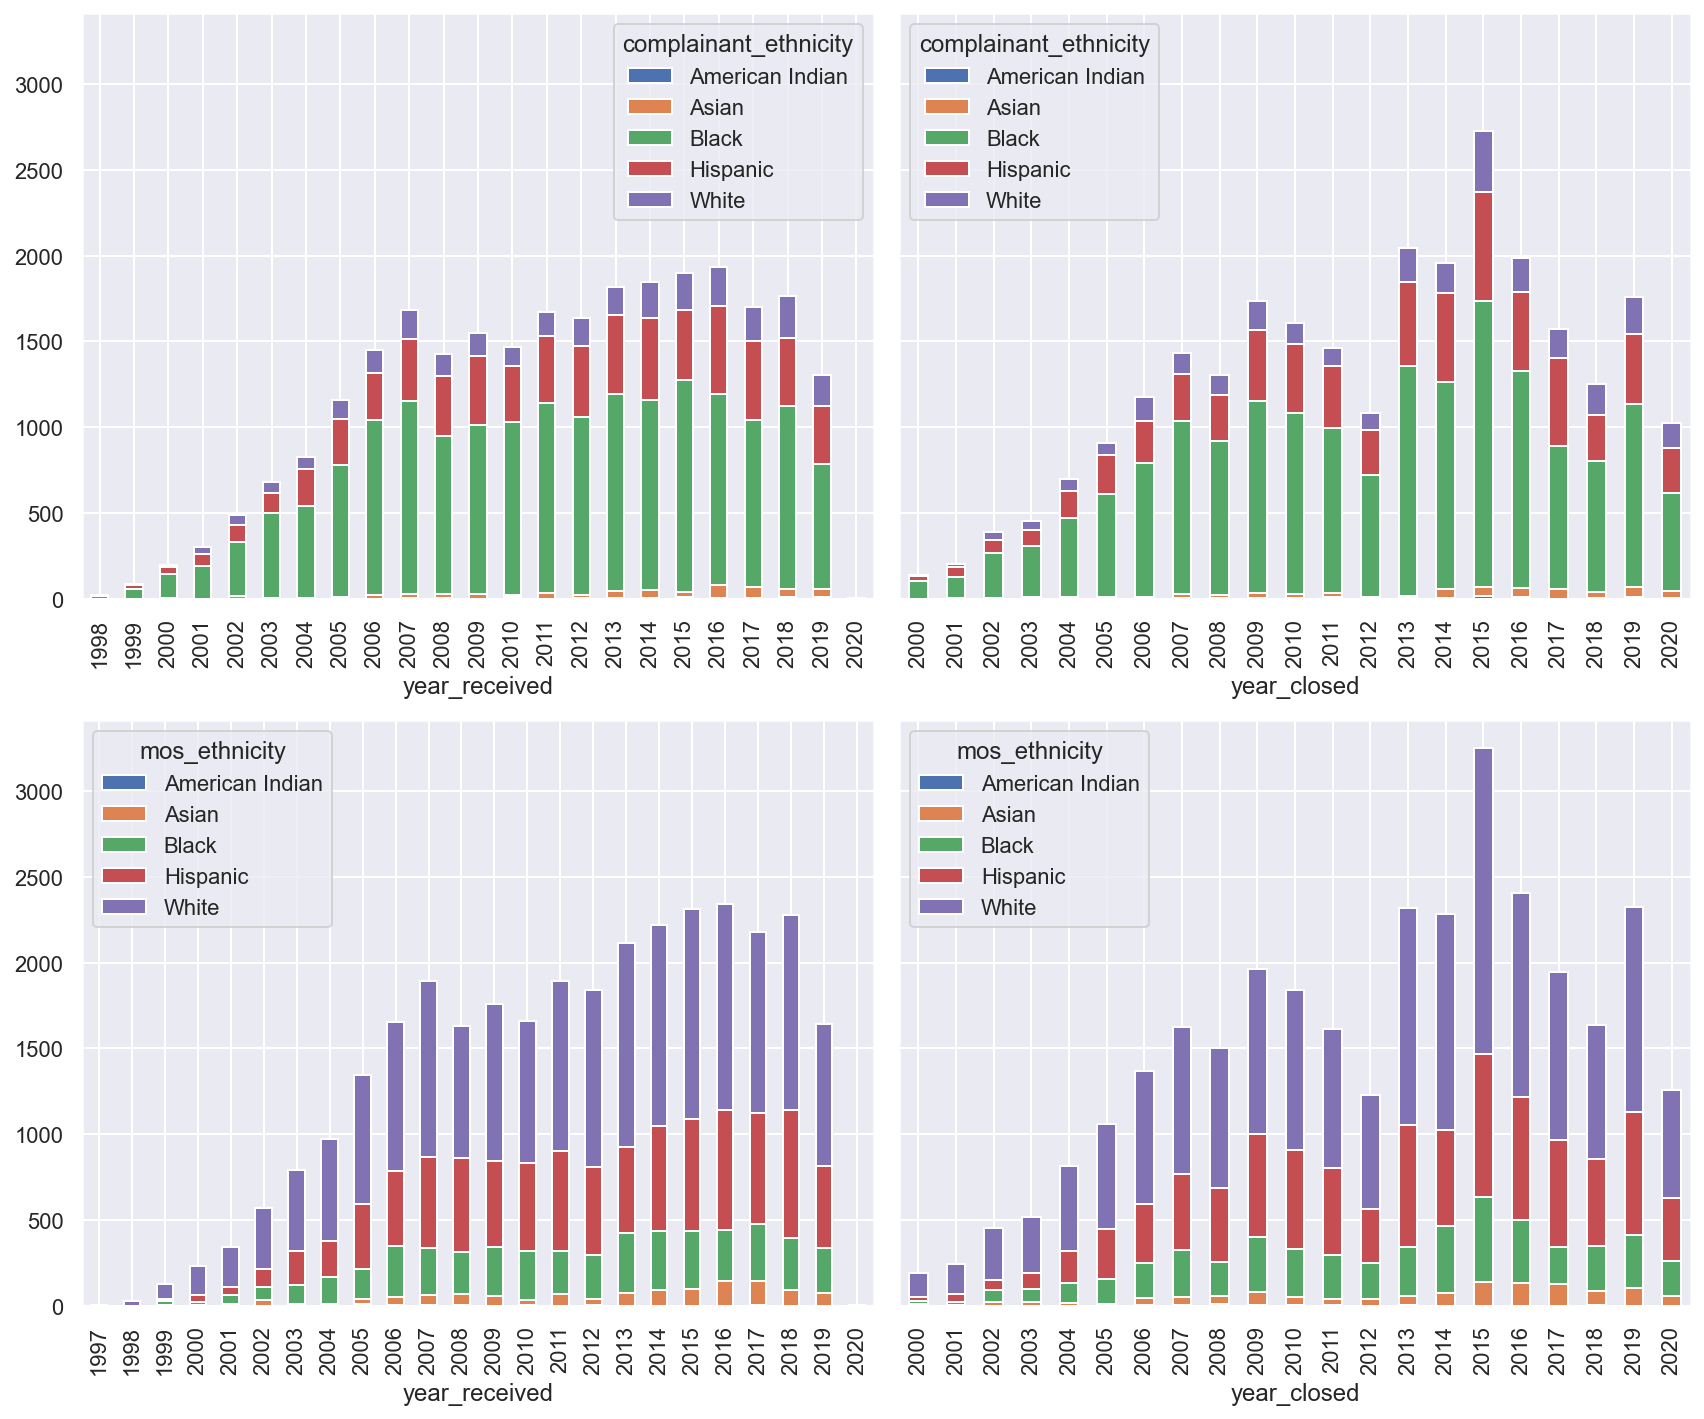

In [383]:
sns.set()
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 10))
axes = axes.ravel()
df_plot1.plot(kind='bar', stacked=True, ax=axes[0])
df_plot1_1.plot(kind='bar', stacked=True, ax=axes[1])
df_plot2.plot(kind='bar', stacked=True, ax=axes[2])
df_plot2_1.plot(kind='bar', stacked=True, ax=axes[3])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
fig.tight_layout()

Text(0.5, 0, 'complainant ethnicity')

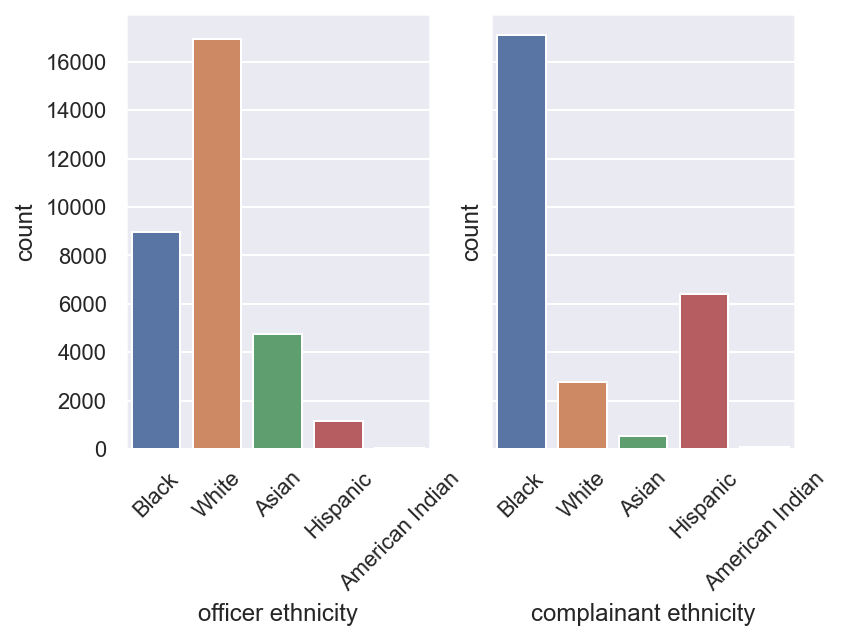

In [384]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, sharey = True, sharex=True)
sns.countplot(x = 'mos_ethnicity', data = df, ax = ax1)
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('officer ethnicity')
sns.countplot(x = 'complainant_ethnicity', data = df, ax = ax2)
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('complainant ethnicity')

In the above plots, I noticed 2 things:

1. Even though there are fluctuation, white people are the majority in officer across all years, and black people are the majority in complainant.
2. The total counts of officer and complainant are different in all years, namely, more officers than the complainants. This result indecates that there is still a lot NaN values in complainants' ethnicity that we need to deal with.

In [385]:
df.isna().any(axis = 1).sum()

4922

In [415]:
df['missing'] = df.isna().any(axis = 1)

In [387]:
df_plot3 = pivoting('missing', 'year_received')
df_plot4 = pivoting('missing', 'year_closed')

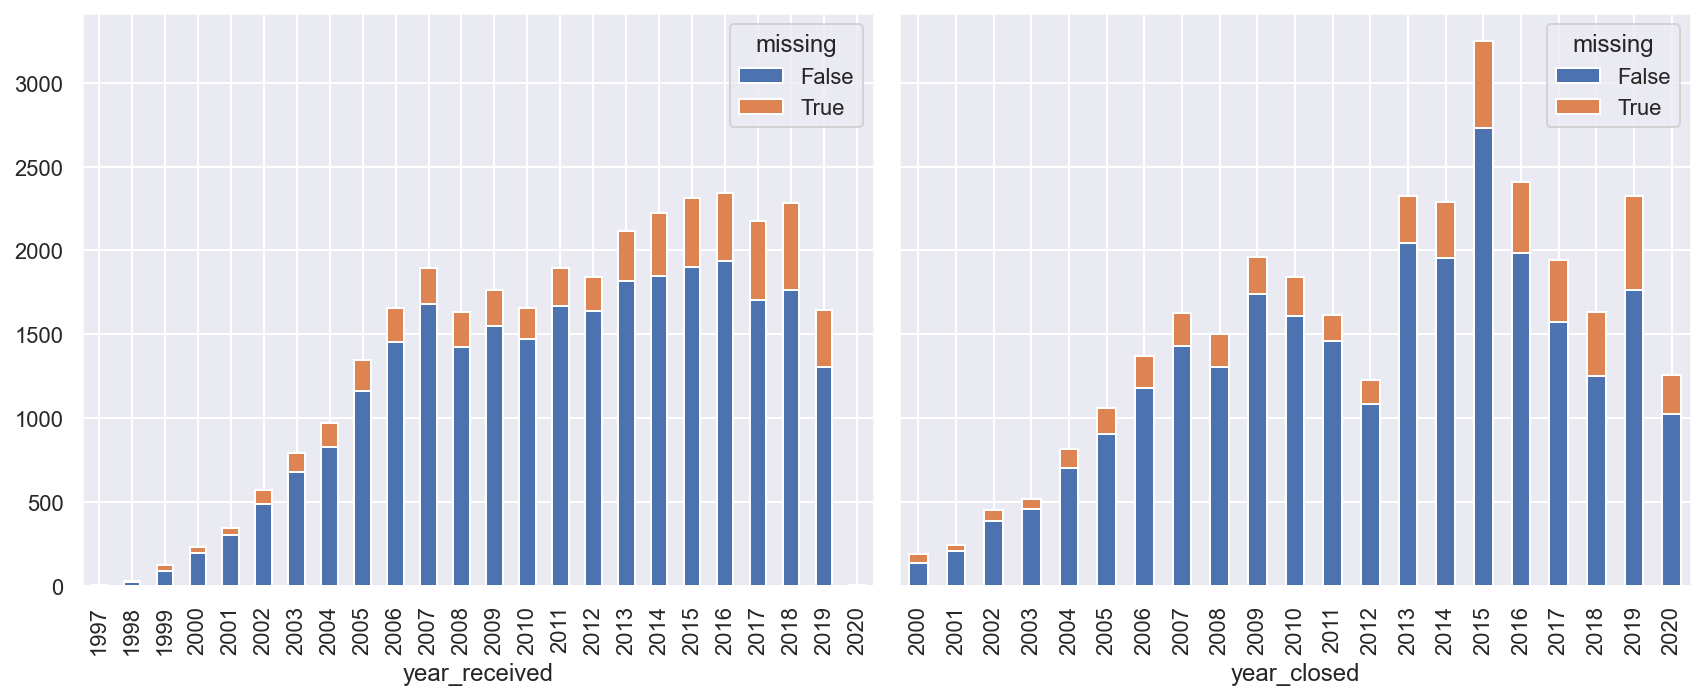

In [388]:
fig, axes = plt.subplots(ncols = 2, sharey = True, figsize=(12,5))
df_plot3.plot(kind='bar', stacked=True, ax = axes[0])
df_plot4.plot(kind='bar', stacked=True, ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
fig.tight_layout()

In the above plot, I noticed that missingness seems to appear more frequently in some years than the others, which may indecate that the missingness can somehow depend on the year_close. However, it may also caused by different number of total records in the year, therefore we need further missingness tests.

Next,I will compare whether each case have the same ethnicity for both officer and complainant, and save the boolean result in column 'compare'.

In [416]:
comparison_column = pd.Series(np.where(df['mos_ethnicity'] == df['complainant_ethnicity'], True, False))
df['compare'] = comparison_column
df.head()

,unique_mos_id,complaint_id,year_received,year_closed,mos_ethnicity,complainant_ethnicity,board_disposition,missing,compare
0,10004,42835,2019,2020,Hispanic,Black,True,False,False
1,10007,24601,2011,2012,White,Black,True,False,False
2,10007,24601,2011,2012,White,Black,True,False,False
3,10007,26146,2012,2013,White,Black,True,False,False
4,10009,40253,2018,2019,Hispanic,NaN,True,True,False


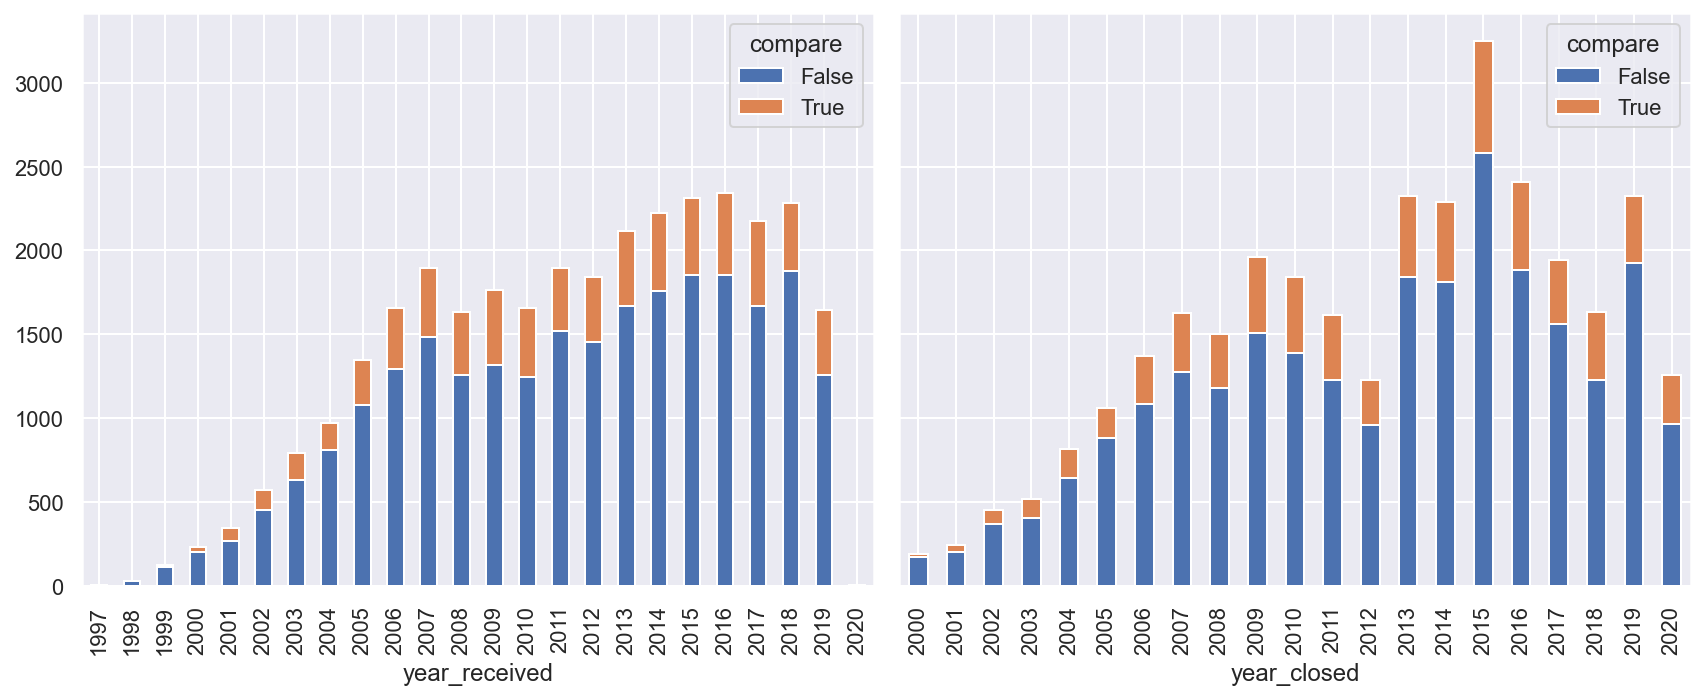

In [31]:
df_plot5 = pivoting('compare', 'year_received')
df_plot6 = pivoting('compare', 'year_closed')
fig, axes = plt.subplots(ncols = 2, sharey = True, figsize=(12,5))
df_plot5.plot(kind='bar', stacked=True, ax = axes[0])
df_plot6.plot(kind='bar', stacked=True, ax = axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
fig.tight_layout()

[Text(0, 0, 'Successful'), Text(1, 0, 'Unsuccessful')]

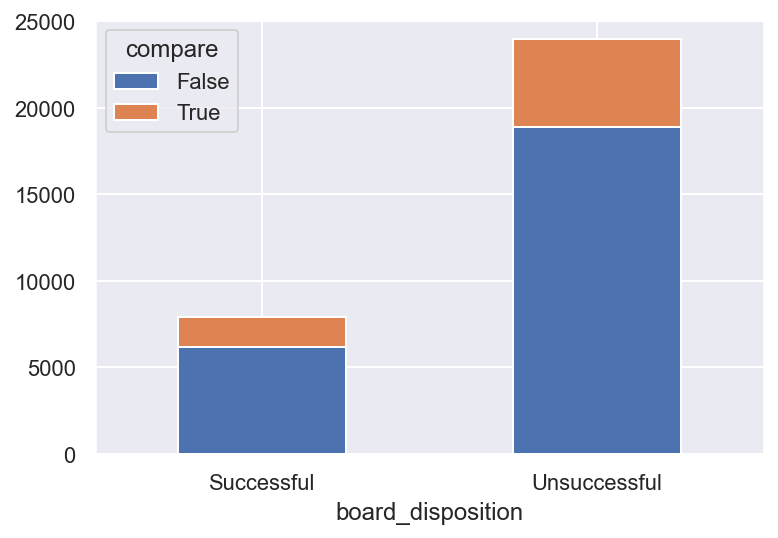

In [32]:
df_plot7 = pivoting('compare', 'board_disposition')
fig = df_plot7.plot(kind='bar', stacked=True)
fig.set_xticklabels(fig.get_xticklabels(), rotation=0)

### Assessment of Missingness

As we've already known, there are no records for complainant_ethnicity before 2000, which is an unignorable missing at design. However, we will select only the rows after 2000 for further assessment of Missingness and hypothesis tests under the assumption that the missingness is MAR dependent on some columns. Given that there is a chance that the missingness after 2000 can be NMAR, however, the dirstibution of missingness is seemingly at random, and I cannot come up with any explanation to defend the assumption that it's NMAR. In this case, I assume there is no relationship between the propensity of complainant_ethnicity to be missing and its values.

In this part, I will perform permutation tests and trying to find out one column for which missingness is dependent and one for which missingness is not dependent using 0.005 as confidence thresholds.

In [33]:
def permutation_test(data, col, group_col, test_statistic, N=1000):
    # get the observed test statistic
    obs = test_statistic(data, col, group_col)

    # run the permutations
    shuffled_stats = []
    for _ in range(N):

        shuffled = data[group_col].sample(
            frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].assign(shuffled=shuffled)
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs

In [34]:
def diff_in_means(data, col, group_col):
    """difference in means"""
    return data.groupby(group_col)[col].mean().diff().iloc[-1]


def tvd(data, col, group_col):
    """tvd of the distribution of values in col
    bewteen the two groups of group_col. col is
    assumed to be categorical."""

    tvd = (data.pivot_table(
        index=col, columns=group_col, aggfunc='size',
        fill_value=0).apply(lambda x: x / x.sum()).diff(
            axis=1).iloc[:, -1].abs().sum() / 2)

    return tvd


def ks(data, col, group_col):
    from scipy.stats import ks_2samp
    # should have only two values in column
    valA, valB = data[group_col].unique()
    ks, _ = ks_2samp(data.loc[data[group_col] == valA, col],
                     data.loc[data[group_col] == valB, col])

    return ks

#### Is the complainant_ethnicity missing at random dependent on the year_received?

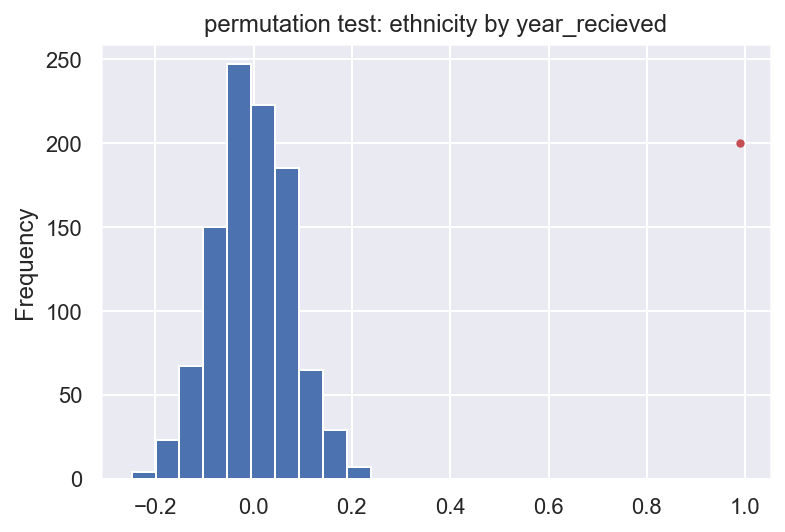

In [35]:
distr, obs = permutation_test(df, 'year_received',  'missing', diff_in_means)

pd.Series(distr).plot(kind='hist', title='permutation test: ethnicity by year_recieved')
plt.scatter(obs, 200, color='r', s=10);

In [36]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.000000


#### Is the complainant_ethnicity missing at random dependent on the year_closed?

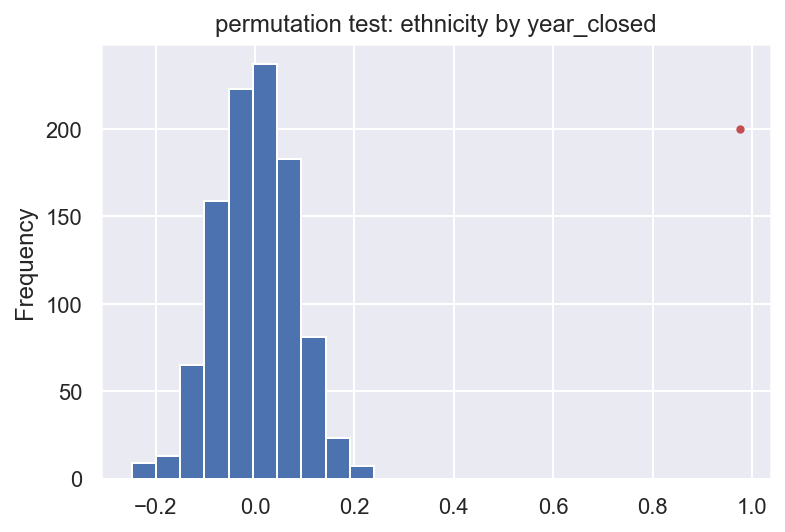

In [37]:
distr, obs = permutation_test(df, 'year_closed', 'missing', diff_in_means)

pd.Series(distr).plot(kind='hist',
                      title='permutation test: ethnicity by year_closed')
plt.scatter(obs, 200, color='r', s=10)

In [38]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.000000


#### Is the complainant_ethnicity missing at random dependent on the board_disposition?

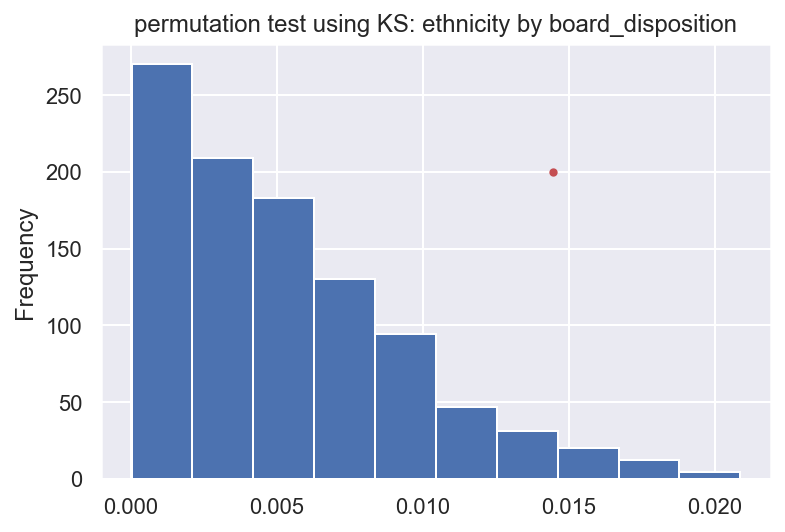

In [39]:
distr, obs = permutation_test(df, 'board_disposition',  'missing', ks)

pd.Series(distr).plot(kind='hist', title='permutation test using KS: ethnicity by board_disposition')
plt.scatter(obs, 200, color='r', s=10);

In [40]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.037000


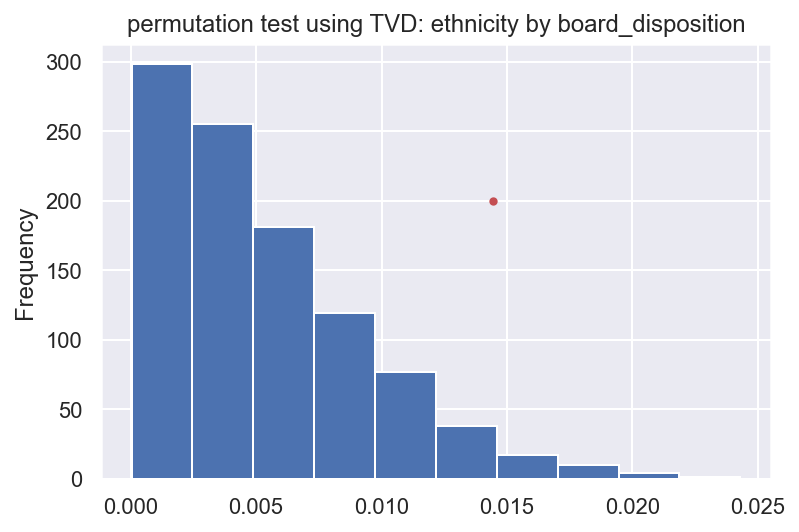

In [41]:
distr, obs = permutation_test(df, 'board_disposition',  'missing', tvd)

pd.Series(distr).plot(kind='hist', title='permutation test using TVD: ethnicity by board_disposition')
plt.scatter(obs, 200, color='r', s=10);

In [42]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.033000


#### Is the complainant_ethnicity missing at random dependent on the mos_ethnicity?

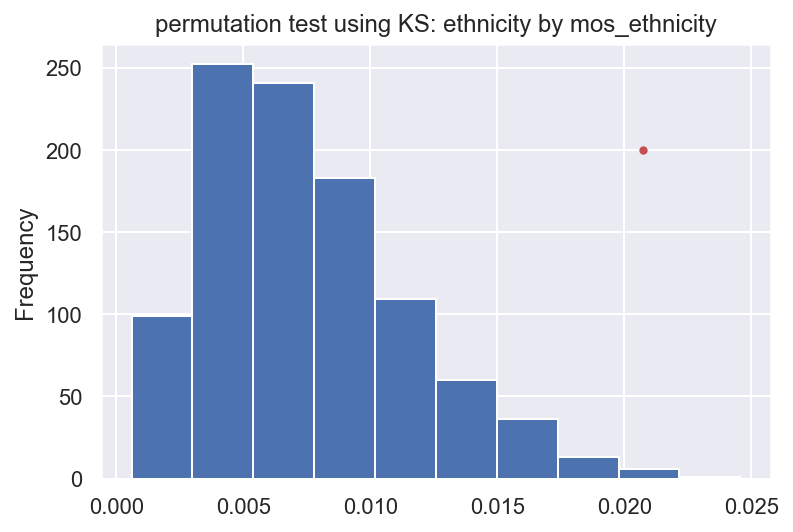

In [43]:
distr, obs = permutation_test(df, 'mos_ethnicity',  'missing', ks)
pd.Series(distr).plot(kind='hist', title='permutation test using KS: ethnicity by mos_ethnicity')
plt.scatter(obs, 200, color='r', s=10);

In [44]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.005000


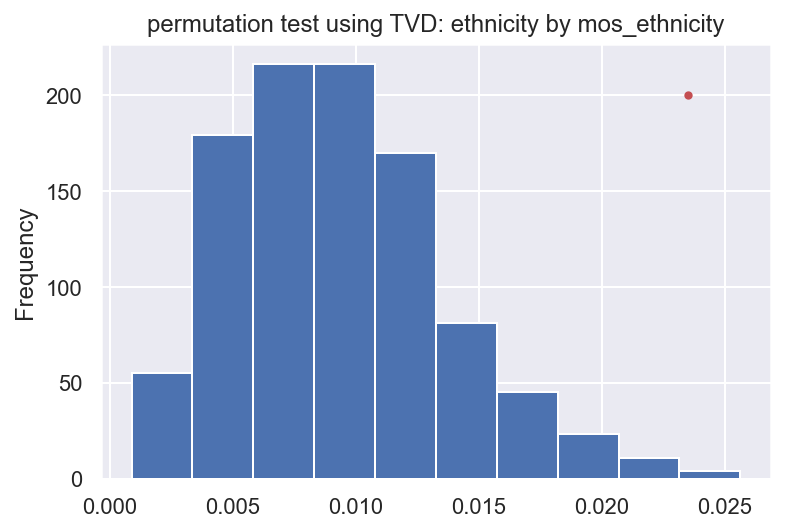

In [45]:
distr, obs = permutation_test(df, 'mos_ethnicity',  'missing', tvd)
pd.Series(distr).plot(kind='hist', title='permutation test using TVD: ethnicity by mos_ethnicity')
plt.scatter(obs, 200, color='r', s=10);

In [46]:
pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.003000


#### Summary

Significantly, I found out that the missingness in complainant_ethnicity is MAR dependent on year_recieved, year_closed, and even on mos_ethnicity. Additionally, the missingness is independent on board_disposition.

Notably, the p-value of missingness dependent on mos_ethnicity is very close to our threshold 0.005, and sometimes smaller based on the N=1000 permutation tests. In this case, the deletion of the missingness rows will surely affect the usefullness of this project, given that our key component, compare column is depend on comparing complainant_ethnicity and mos_ethnicity. Even though we cannot fully discover the hidden connection between two, we can still conclude that the ethnicity of officers significantly affect the data collection of complainants' ethnicity. Unfortunately, I do not have further knowledge about what caused this missing and what to fill the gaps, I may delete these NaN rws or perform imputation.

### Hypothesis Test

First we will first perform categorical imputation, which fill in the NaN with the mode in each groups pf officers' ethnicity.

In [417]:
df_mc = df[['mos_ethnicity', 'complainant_ethnicity', 'board_disposition']]

In [418]:
df_mc['complainant_ethnicity'] = df_mc.groupby('mos_ethnicity')['complainant_ethnicity'].apply(lambda x:x.fillna(x.value_counts().index[0]))

<ipython-input-418-426098165052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc['complainant_ethnicity'] = df_mc.groupby('mos_ethnicity')['complainant_ethnicity'].apply(lambda x:x.fillna(x.value_counts().index[0]))


In [419]:
df_mc.isna().sum()

mos_ethnicity            0
complainant_ethnicity    0
board_disposition        0
dtype: int64

In [420]:
df_mc['compare'] = pd.Series(np.where(df_mc['mos_ethnicity'] == df_mc['complainant_ethnicity'], True, False))
df_mc.head()

<ipython-input-420-bca1523e84b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mc['compare'] = pd.Series(np.where(df_mc['mos_ethnicity'] == df_mc['complainant_ethnicity'], True, False))


,mos_ethnicity,complainant_ethnicity,board_disposition,compare
0,Hispanic,Black,True,False
1,White,Black,True,False
2,White,Black,True,False
3,White,Black,True,False
4,Hispanic,Black,True,False


#### Permutation Test
Given that our question is "Are cases in which the officer and complaintant are not the same ethnicity more likely to have difference in board resuld?"

Null Hypothesis: The cases which officers' and complainants' ethnicity are different and the ones are the same have the same successeful rate.

Alternative Hypothesis: The cases which officers' and complainants' ethnicity are different and the ones are the same have different successeful rate.

Test Statistics: Mean. TVD, KS
Given that we can either treat board_disposition as numerical (1 and 0) while compare as grouping category, or we can treat board_disposition as categorical. In this case, we can use all three test statistics for permutation tests.

Significant Level: 0.01

p-value: 0.067000


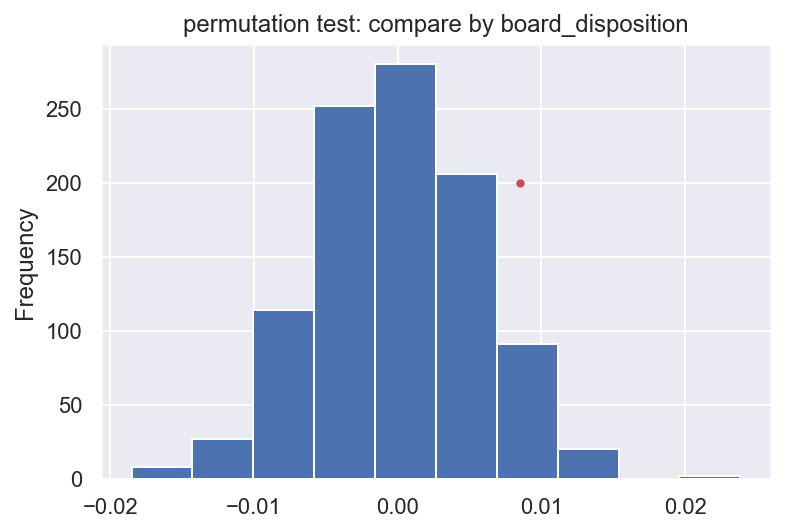

In [428]:
distr, obs = permutation_test(df_mc, 'board_disposition',  'compare', diff_in_means)

pd.Series(distr).plot(kind='hist', title='permutation test: compare by board_disposition')
plt.scatter(obs, 200, color='r', s=10);

pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.141000


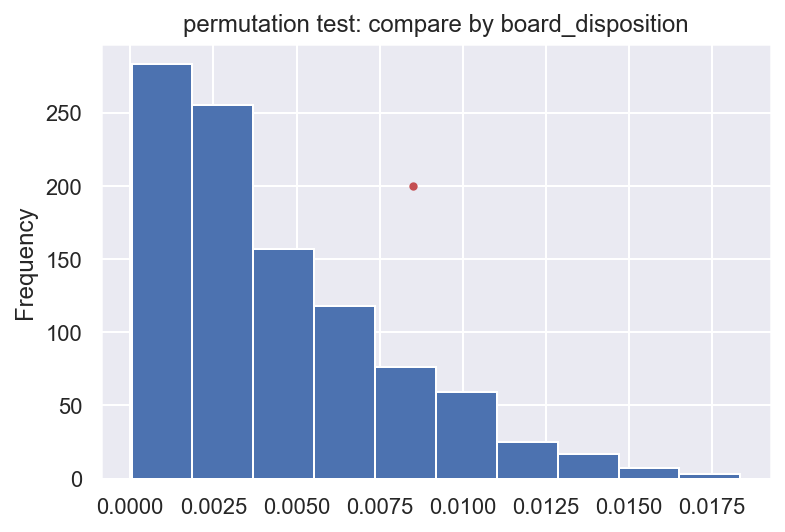

In [429]:
distr, obs = permutation_test(df_mc, 'board_disposition',  'compare', tvd)

pd.Series(distr).plot(kind='hist', title='permutation test: compare by board_disposition')
plt.scatter(obs, 200, color='r', s=10);

pval = (distr >= obs).mean()
print('p-value: %f' % pval)

p-value: 0.142000


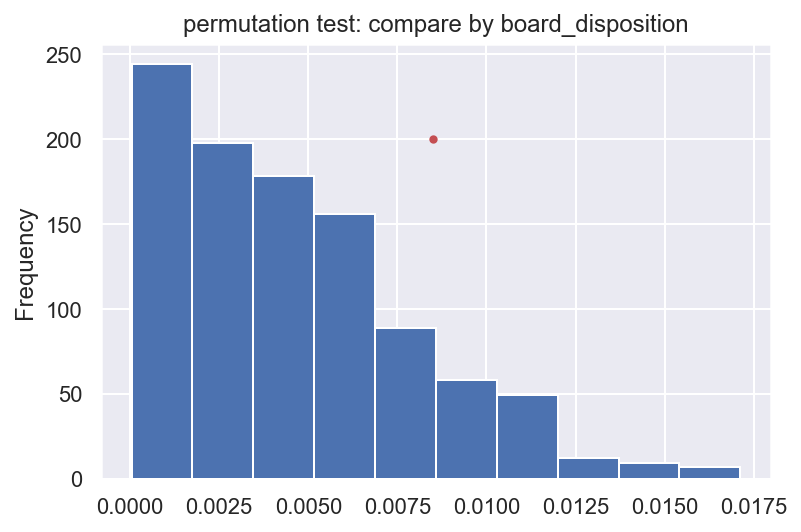

In [430]:
distr, obs = permutation_test(df_mc, 'board_disposition',  'compare', ks)

pd.Series(distr).plot(kind='hist', title='permutation test: compare by board_disposition')
plt.scatter(obs, 200, color='r', s=10);

pval = (distr >= obs).mean()
print('p-value: %f' % pval)

As we can see, in all three permutaion tests, p-values are all bigger than our significant level (0.01), therefore, it cannot support the alternative hypothses, we cannot conclude that the null hypothesis is wrong. In this case, we cannot prove that the cases which officers' and complainants' ethnicity are different and the ones are the same have different successeful rate.